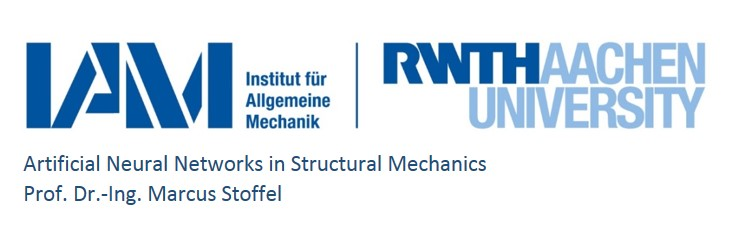

# Exercise 8

The goal of this exercise is to understand underfitting and overfitting of a model and ways to workaround it.
*******************************************************************************************************************************
Session:
-------------
* Understanding feature scaling.
* Comparing scaling strategies.
* Understanding the reason for Underfitting and overfitting.
* Strategy to detect overfitting.
* Datasets for training.
* Strategies to control overfitting. (L0,L1 and L2 regularisations)
* Comparing different regularization strategies.
* Implementing the above strategies to train our model.

The session involves following tasks

Task:
--------

* Import the data from csv file using pandas.
* Split the data into test and train, inputs and outputs.
* Setup layers required for computation.
* Train and save the model.
* Reload the model and predict the output using test data. 
* Plot errors.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
data = pd.read_csv('ipdata.csv',delimiter=',')
data.head()

,TimeStep,LE11,LE12,LE22,LE33,PE11,PE12,PE22,PE33,S11,S12,S22,S33
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0
1,0.000032,4.031180e-11,-3.385710e-12,6.256980e-11,-5.067300e-11,0.0,0.0,0.0,0.0,4.610813,-0.085788,5.73877,0
2,0.000062,1.043600e-07,5.346210e-09,1.261470e-07,-1.135330e-07,0.0,0.0,0.0,0.0,11042.105470,135.464233,12146.21777,0
3,0.000093,1.538210e-06,1.695630e-08,1.696870e-06,-1.593400e-06,0.0,0.0,0.0,0.0,158699.515600,429.644714,166740.00000,0
4,0.000120,5.731500e-06,-9.685100e-07,6.130000e-06,-5.842230e-06,0.0,0.0,0.0,0.0,586518.687500,-24540.449220,606713.50000,0


In [5]:
x = np.array(data.drop(columns=['S11','S12','S22','S33']))
y = np.array(data.drop(columns=['LE11','LE12','LE22','LE33','PE11','PE12','PE22','PE33','S33']))
a = np.linspace(0,10,len(x)) #for plotting

# Feature scaling

### Min Max Normalization


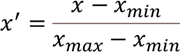

### Standardization or Z Score Normalization

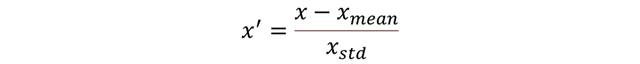

In [6]:
# Define functions for feature scaling

def min_max_norm(x):
    
    return (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

def z_score_norm_standardisation(x):
    
    return (x-x.mean(axis=0))/(x.std(axis=0))

In [7]:
# Perform feature scaling using defined functions
x_mm = min_max_norm(x)
y_mm = min_max_norm(y)
x_std  = z_score_norm_standardisation(x)
y_std  = z_score_norm_standardisation(y)

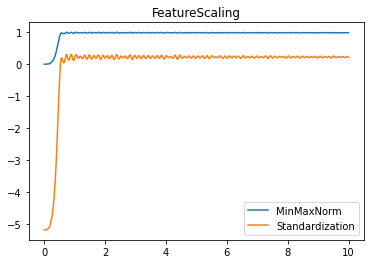

In [8]:
# Plot to compare different scaling techniques
plt.title('FeatureScaling')
plt.plot(a,x_mm[:,1],label='MinMaxNorm')
plt.plot(a,x_std[:,1],label='Standardization')
plt.legend()

In [9]:
# Initialize scalers from scikit learn
minmax = MinMaxScaler()
zscore = StandardScaler()

In [10]:
# Perform feature scaling using scikitlearn scalers
x_skmm  = minmax.fit_transform(x)
y_skmm  = minmax.fit_transform(y)

x_skstd = zscore.fit_transform(x)
y_skstd = zscore.fit_transform(y)

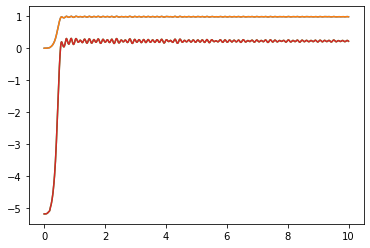

In [11]:
# Compare defined functions and scikitlearn scalers
plt.plot(a,x_mm[:,1],label='MinMaxNorm')
plt.plot(a,x_skmm[:,1],label='MinMaxNorm_Sklearn')
plt.plot(a,x_std[:,1],label='ZscoreNorm')
plt.plot(a,x_skstd[:,1],label='ZscoreNorm_Sklearn')

In [12]:
# Build a Sequential model with one hidden layer

model = models.Sequential()

model.add(layers.Dense(10,activation='relu',use_bias=True,input_shape=(x.shape[1],)))
model.add(layers.Dense(y.shape[1],activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='RMSProp',loss='mse',metrics=['mse','mae','accuracy'])

### Fit the unscaled data for 10 epochs and see how the error looks and reduces

In [14]:
history1 = model.fit(x,y,epochs=10,verbose=1)

Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 1182751583633408.0000 - mse: 1182751583633408.0000 - mae: 20543396.0000 - accuracy: 0.4286
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 1182751852068864.0000 - mse: 1182751852068864.0000 - mae: 20543396.0000 - accuracy: 0.4985
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1182751717851136.0000 - mse: 1182751717851136.0000 - mae: 20543394.0000 - accuracy: 0.4985
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1182751852068864.0000 - mse: 1182751852068864.0000 - mae: 20543394.0000 - accuracy: 0.4985
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1182751717851136.0000 - mse: 1182751717851136.0000 - mae: 20543398.0000 - accuracy: 0.4985
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 1182751583633408.0000 - mse: 1182751583633408.0000 - mae: 20543394.0000 - accuracy: 0.4985
Epoch 7/10
32/32 [====

### Fit the Min-Max normalized data for 10 epochs and see how the error looks and reduces

In [15]:
history2 = model.fit(x_mm,y_mm,epochs=10,verbose=2)

Epoch 1/10
32/32 - 0s - loss: 48.6343 - mse: 48.6343 - mae: 5.9142 - accuracy: 0.2298
Epoch 2/10
32/32 - 0s - loss: 46.4929 - mse: 46.4929 - mae: 5.7804 - accuracy: 0.2517
Epoch 3/10
32/32 - 0s - loss: 43.9194 - mse: 43.9194 - mae: 5.6107 - accuracy: 0.2517
Epoch 4/10
32/32 - 0s - loss: 40.5157 - mse: 40.5157 - mae: 5.3794 - accuracy: 0.2488
Epoch 5/10
32/32 - 0s - loss: 36.0136 - mse: 36.0136 - mae: 5.0600 - accuracy: 0.2488
Epoch 6/10
32/32 - 0s - loss: 30.8021 - mse: 30.8021 - mae: 4.6635 - accuracy: 0.2488
Epoch 7/10
32/32 - 0s - loss: 24.7757 - mse: 24.7757 - mae: 4.1615 - accuracy: 0.2488
Epoch 8/10
32/32 - 0s - loss: 17.2241 - mse: 17.2241 - mae: 3.4378 - accuracy: 0.2488
Epoch 9/10
32/32 - 0s - loss: 9.7080 - mse: 9.7080 - mae: 2.5193 - accuracy: 0.2488
Epoch 10/10
32/32 - 0s - loss: 4.4548 - mse: 4.4548 - mae: 1.5820 - accuracy: 0.2488


### Fit the Standardized data for 10 epochs and see how the error looks and reduces

In [16]:
history3 = model.fit(x_std,y_std,epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 4ms/step - loss: 3.5034 - mse: 3.5034 - mae: 1.5516 - accuracy: 0.3217
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 2.3970 - mse: 2.3970 - mae: 1.2806 - accuracy: 0.3437
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1.6960 - mse: 1.6960 - mae: 1.0647 - accuracy: 0.3556
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1.3226 - mse: 1.3226 - mae: 0.9228 - accuracy: 0.3536
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1.1193 - mse: 1.1193 - mae: 0.8326 - accuracy: 0.3866
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.9905 - mse: 0.9905 - mae: 0.7692 - accuracy: 0.5065
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8919 - mse: 0.8919 - mae: 0.7217 - accuracy: 0.5674
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8198 - mse: 0.8198 - mae: 0.6832 - accuracy:

# Overfitting and Underfitting

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
dataset = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv',delimiter=',')
dataset.shape

(63023, 13)

## Prepare dataset

* Remove NAN values
* Drop columns "Suburb", "Address", "CouncilArea"
* Remove dummies

In [19]:
dataset = dataset.drop(columns=['Suburb','Address','CouncilArea'])
# dataset.head()

In [20]:
dataset.dropna(inplace=True)

In [21]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [22]:
dataset.shape

(48433, 550)

In [23]:
dataset['Price']

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63016     347700.0
63017     808000.0
63018     566000.0
63019     500000.0
63020     545000.0
Name: Price, Length: 48433, dtype: float64

## Split data

* m - input data which contains all the columns except price
* n - output data which is just price

In [24]:
m = min_max_norm(dataset.drop(['Price'],axis=1))
n = min_max_norm(dataset['Price'])

## Split the data using train_test_split

In [25]:
m_train,m_test,n_train,n_test = train_test_split(m,n,test_size=0.2,random_state=27)

## Use Sklearn LinearRegressiosn to fit the data

In [26]:
from sklearn.linear_model import LinearRegression

LinearModel = LinearRegression().fit(m_train,n_train)

In [27]:
LinearModel.score(m_test, n_test)

-4.089724443309735e+19

In [28]:
LinearModel.score(m_train, n_train)

0.585622117570781

## L1 Regularization aka Lasso

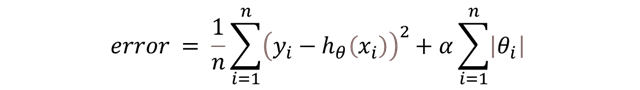

In [29]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=0.01,max_iter=100,tol=0.1)

lasso_reg.fit(m_train,n_train)

Lasso(alpha=0.01, max_iter=100, tol=0.1)

In [30]:
lasso_reg.score(m_test,n_test)

-3.512290424967368e-05

## L2 Regularization aka Ridge

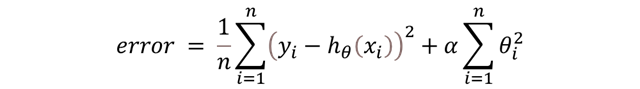

In [31]:
ridge_reg = linear_model.Ridge(alpha=10,max_iter=100,tol=0.1)

ridge_reg.fit(m_train,n_train)

Ridge(alpha=10, max_iter=100, tol=0.1)

In [32]:
ridge_reg.score(m_test,n_test)

0.5616153023076861

# Evaluating Machine learning models

## Splitting data sets for testing and training

* Use the data from ipdata.csv file
* Use any of the normalization methods to scale data

In [33]:
x_scaled = minmax.fit_transform(x)
y_scaled = minmax.fit_transform(y)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.3,random_state=27)

### Define a sequential model with two hidden layers


In [35]:
matmodel = models.Sequential()

matmodel.add(layers.Dense(10,activation='relu',input_shape=(x_train.shape[1],)))
matmodel.add(layers.Dense(10,activation='relu',activity_regularizer=regularizers.l1(1e-2)))
matmodel.add(layers.Dropout(0.5))
matmodel.add(layers.Dense(y_train.shape[1],activation='linear'))

matmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 44        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [36]:
matmodel.compile(optimizer='RMSProp',loss='mse',metrics=['mse','mae','accuracy'])

In [37]:
history = matmodel.fit(x_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 17ms/step - loss: 0.3866 - mse: 0.3832 - mae: 0.5644 - accuracy: 0.3036 - val_loss: 0.2791 - val_mse: 0.2761 - val_mae: 0.4828 - val_accuracy: 0.3500
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 0.2572 - mse: 0.2542 - mae: 0.4531 - accuracy: 0.3268 - val_loss: 0.2090 - val_mse: 0.2053 - val_mae: 0.4089 - val_accuracy: 0.4357
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 0.2118 - mse: 0.2077 - mae: 0.4000 - accuracy: 0.3375 - val_loss: 0.1679 - val_mse: 0.1630 - val_mae: 0.3583 - val_accuracy: 0.4357
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 0.1942 - mse: 0.1891 - mae: 0.3735 - accuracy: 0.3179 - val_loss: 0.1407 - val_mse: 0.1350 - val_mae: 0.3226 - val_accuracy: 0.4357
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.1786 - mse: 0.1731 - mae: 0.3541 - accuracy: 0.2839 - val_loss: 0.1281 - val_mse: 0.1225 - val_mae: 0.

Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0359 - mse: 0.0344 - mae: 0.1441 - accuracy: 0.3929 - val_loss: 0.0302 - val_mse: 0.0286 - val_mae: 0.1398 - val_accuracy: 0.5500
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0350 - mse: 0.0334 - mae: 0.1420 - accuracy: 0.3804 - val_loss: 0.0308 - val_mse: 0.0294 - val_mae: 0.1424 - val_accuracy: 0.5214
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0347 - mse: 0.0332 - mae: 0.1417 - accuracy: 0.3946 - val_loss: 0.0301 - val_mse: 0.0283 - val_mae: 0.1394 - val_accuracy: 0.5429
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0342 - mse: 0.0326 - mae: 0.1402 - accuracy: 0.3732 - val_loss: 0.0299 - val_mse: 0.0281 - val_mae: 0.1383 - val_accuracy: 0.5571
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0355 - mse: 0.0339 - mae: 0.1433 - accuracy: 0.3589 - val_loss: 0.0302 - val_mse: 0.0287 - val_mae: 

Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0334 - mse: 0.0319 - mae: 0.1372 - accuracy: 0.4321 - val_loss: 0.0264 - val_mse: 0.0249 - val_mae: 0.1299 - val_accuracy: 0.5929
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0328 - mse: 0.0314 - mae: 0.1364 - accuracy: 0.4679 - val_loss: 0.0260 - val_mse: 0.0245 - val_mae: 0.1286 - val_accuracy: 0.6286
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0319 - mse: 0.0305 - mae: 0.1341 - accuracy: 0.4536 - val_loss: 0.0260 - val_mse: 0.0245 - val_mae: 0.1288 - val_accuracy: 0.6357
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0330 - mse: 0.0316 - mae: 0.1379 - accuracy: 0.4304 - val_loss: 0.0255 - val_mse: 0.0239 - val_mae: 0.1267 - val_accuracy: 0.6143
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0318 - mse: 0.0304 - mae: 0.1345 - accuracy: 0.4554 - val_loss: 0.0272 - val_mse: 0.0260 - val_mae: 

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mse,mae,accuracy,val_loss,val_mse,val_mae,val_accuracy,epoch
0,0.386561,0.383221,0.564363,0.303571,0.279104,0.276099,0.482829,0.350000,0
1,0.257165,0.254210,0.453062,0.326786,0.209002,0.205285,0.408925,0.435714,1
2,0.211760,0.207730,0.399989,0.337500,0.167909,0.162972,0.358348,0.435714,2
3,0.194152,0.189123,0.373524,0.317857,0.140672,0.135007,0.322553,0.435714,3
4,0.178581,0.173068,0.354133,0.283929,0.128108,0.122501,0.305451,0.435714,4


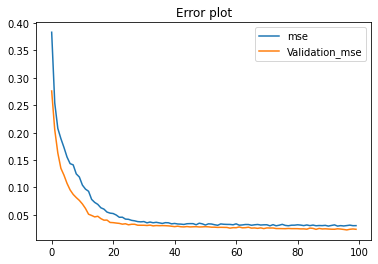

In [39]:
plt.title('Error plot')
plt.plot(hist['mse'], label='mse')
plt.plot(hist['val_mse'], label='Validation_mse')
plt.legend()

In [41]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 4ms/step - loss: 2.4912 - mse: 2.4912 - mae: 1.2372 - accuracy: 0.5615


[2.491173028945923, 2.491173028945923, 1.2372210025787354, 0.5614618062973022]

## K-Fold Cross Validation with holdout

aka The Gold Standard of CV

Fold :: 1
Fold score (RMSE)        :: 0.10706249456183062
Fold :: 2
Fold score (RMSE)        :: 0.13097369835571337
Fold :: 3
Fold score (RMSE)        :: 0.12871718774651095
Fold :: 4
Fold score (RMSE)        :: 0.12095316826273589
Fold :: 5
Fold score (RMSE)        :: 0.12085180046530633

Cross-validated score (RMSE):: 0.12199953148487569
Holdout score (RMSE)     :: 0.12963259646866301


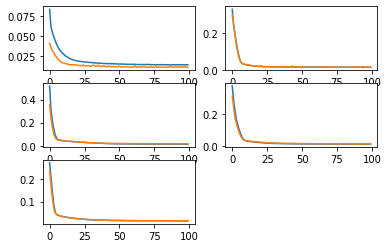

In [43]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True, random_state=42)
    
sample_y = []
sample_pred = []
fold = 0
for train, test in kf.split(x_train):        
    fold+=1
    print("Fold :: {}".format(fold))
        
    x_tr = x_train[train]
    y_tr = y_train[train]
    x_te = x_train[test]
    y_te = y_train[test]
    
    kfmodel = models.Sequential()
    kfmodel.add(layers.Dense(10, activation='relu',use_bias=True, input_shape= (x_tr.shape[1],)))
    kfmodel.add(layers.Dense(10, activation='relu',use_bias=True))                                  
    kfmodel.add(layers.Dense(y_train.shape[1], use_bias=True, activation='linear'))
    
    kfmodel.compile(optimizer='RMSProp', loss='mse', metrics=['mae', 'mse'])
    
    history = kfmodel.fit(x_tr,y_tr,validation_data=(x_te,y_te),verbose=0,epochs=100)
    
    his = pd.DataFrame(history.history)
    plt.subplot(3,2,fold)
    plt.plot(his['mse'], label='mse')
    plt.plot(his['val_mse'], label='Validation_mse')
    
    pred = kfmodel.predict(x_te)
    
    sample_y.append(y_te)
    sample_pred.append(pred)

    # Measure 
    score = np.sqrt(metrics.mean_squared_error(pred,y_te))
    print("Fold score (RMSE)        :: {}".format(score))


# Build the out of sample prediction list and calculate the error.
sample_y = np.concatenate(sample_y)
sample_pred = np.concatenate(sample_pred)
score = np.sqrt(metrics.mean_squared_error(sample_pred,sample_y))
print()
print("Cross-validated score (RMSE):: {}".format(score))    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = kfmodel.predict(x_test)

score = np.sqrt(metrics.mean_squared_error(holdout_pred,y_test))
print("Holdout score (RMSE)     :: {}".format(score))